In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import random

In [7]:
data = pd.read_csv("titanic-passengers.csv",sep=';')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [8]:
data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null object
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [10]:
#For the correlation matrix
data.replace({'Survived':{"No":0,"Yes":1}},inplace=True)
data.replace({'Sex':{"female":0,"male":1}},inplace=True)
data = data.drop(['PassengerId','Ticket'],axis=1)

In [11]:
columns = data.columns
dataLen = len(data)

In [12]:
miss_Cols = []
for column in columns:
    if data.count()[column]!=dataLen:
        miss_Cols.append(column)
print(miss_Cols," contain missing values")

['Age', 'Cabin', 'Embarked']  contain missing values


In [13]:
print(data['Age'].isnull().sum())
data["Age"].fillna(data["Age"].mean(),inplace=True)
print("After imputing Age column by using mean values")
print(data['Age'].isnull().sum())

177
After imputing Age column by using mean values
0


In [14]:
i = int(random.uniform(0, 2.9))
data["Cabin"].value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
F33            3
C22 C26        3
              ..
E31            1
E50            1
D49            1
B41            1
C103           1
Name: Cabin, Length: 147, dtype: int64

In [15]:
print(data["Cabin"].isnull().sum())
data['Cabin'].fillna(data["Cabin"].value_counts().index[i],inplace=True)
print("After imputing Cabin column by the most three frequent elements")
print(data["Cabin"].isnull().sum())


687
After imputing Cabin column by the most three frequent elements
0


In [16]:
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
print(data["Embarked"].isnull().sum())
data['Embarked'].fillna(data["Embarked"].value_counts().index[0],inplace=True)
print("After imputing Embarked column by the most frequent element")
print(data["Embarked"].isnull().sum())

2
After imputing Embarked column by the most frequent element
0


According to my understanding to the problematic, the features that won't contribute are: PassengerId, Ticket and Name

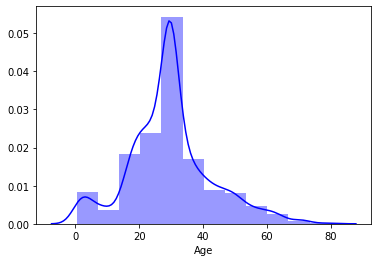

In [18]:
sb.distplot(data["Age"],bins = 12,hist = True, kde = True, color = 'blue')

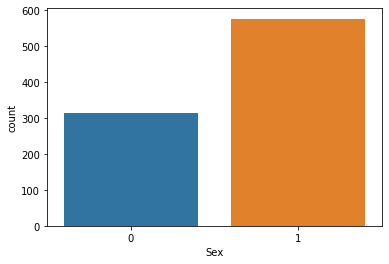

In [19]:
sb.countplot(x = 'Sex',data = data)

C:\Users\uchiha\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


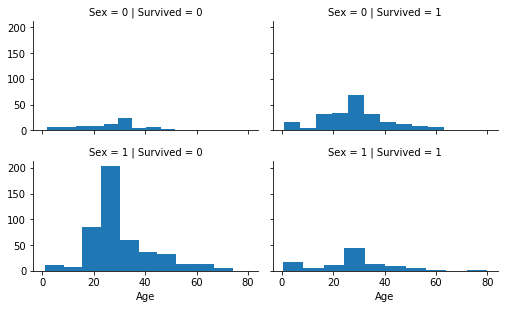

In [20]:
grid = sb.FacetGrid(data,row="Sex", col="Survived", size=2.2, aspect=1.6)
grid.map(plt.hist,'Age')
grid.add_legend()

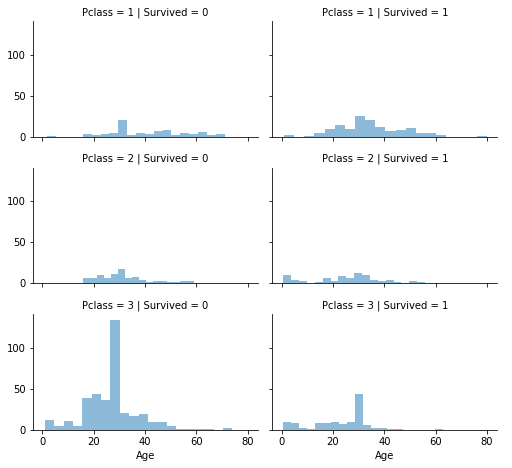

In [21]:
grid = sb.FacetGrid(data, row='Pclass',col='Survived', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

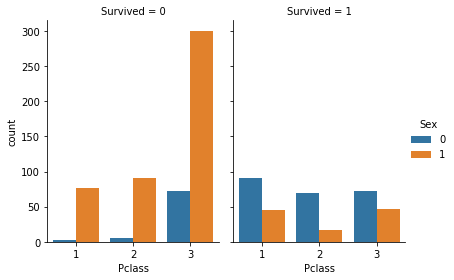

In [22]:
sb.catplot(x="Pclass",hue="Sex", col="Survived",
                data=data, kind="count",
                height=4, aspect=.7)

Here we see clearly, that Pclass is contributing to a persons chance of survival, especially if this person is in class 1

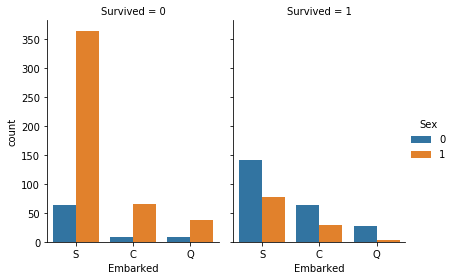

In [23]:
sb.catplot(x="Embarked",hue="Sex", col="Survived",
                data=data, kind="count",
                height=4, aspect=.7)


In [39]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sb.diverging_palette( 220 , 10 , as_cmap = True )

    s = sb.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

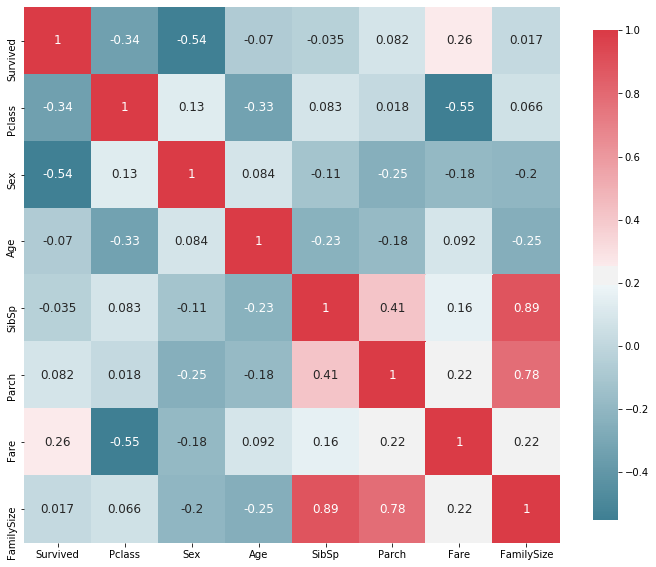

In [40]:
plot_correlation_map(data)


A correlation matrix is a tabular data representing the ‘correlations’ between pairs of variables in a given data by giving a number that denotes the strength of the relationship between two variables.
In this example, We can conclude that the variables with greatest correlation to survival are Sex and Pclass. Since fare and Pclass correlate so highly, we should only consider one in our analysis for the sake of simplicity. 


In [ ]:
data[['Pclass','Survived']].groupby('Pclass',as_index=True).mean()

In [25]:
data["Title"] = [title.split(",")[1].split('.')[0].lstrip()  for title in data["Name"]]

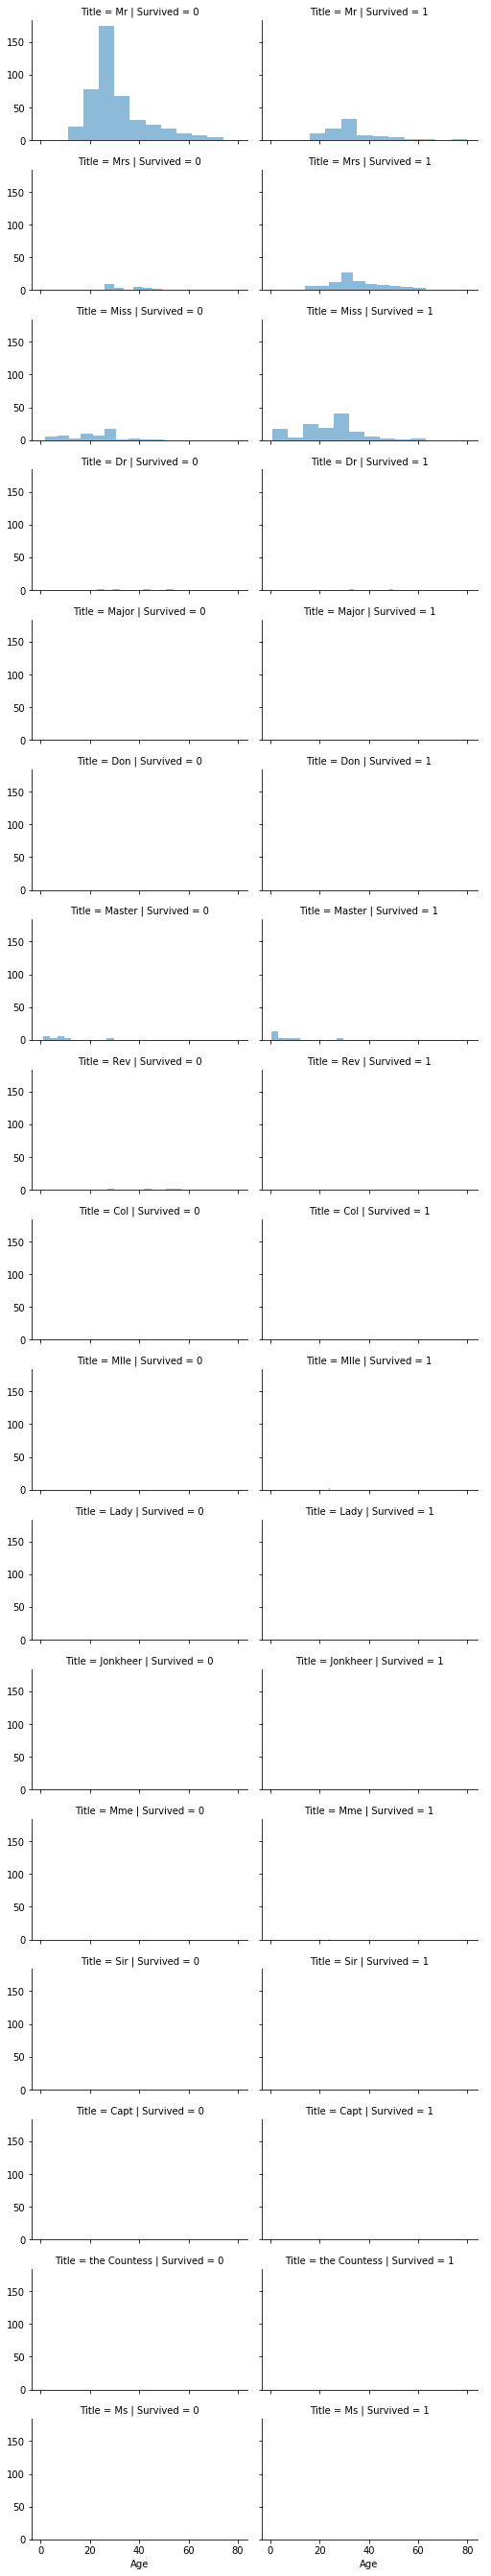

In [26]:
grid = sb.FacetGrid(data, row="Title", col="Survived", size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=10)
grid.add_legend()

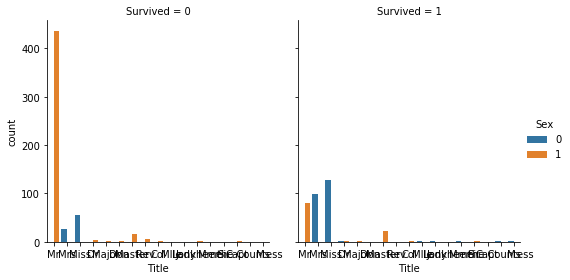

In [27]:
sb.catplot(x="Title",hue="Sex", col="Survived",
                data=data, kind="count",
                height=4, aspect=.9)

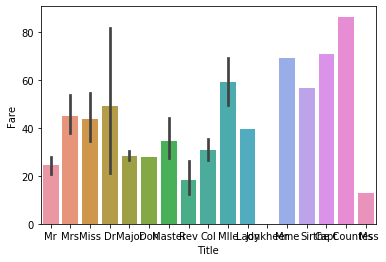

In [28]:
sb.barplot(x='Title', y='Fare', data=data)

In [29]:
Title_Dictionary = {"Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                    "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs"

                    }

In [30]:
data.replace(Title_Dictionary,inplace=True)

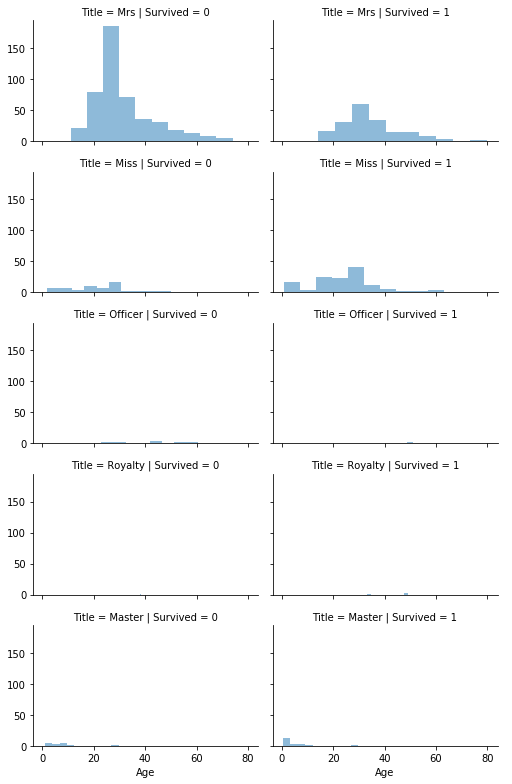

In [31]:
grid = sb.FacetGrid(data, row="Title", col="Survived", size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=10)
grid.add_legend()

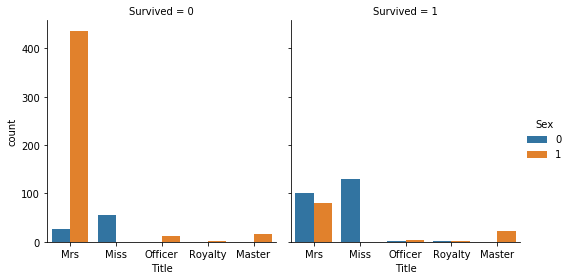

In [32]:
sb.catplot(x="Title",hue="Sex", col="Survived",
                data=data, kind="count",
                height=4, aspect=.9)

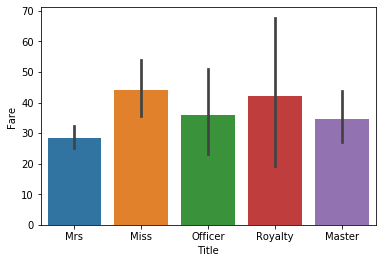

In [33]:
sb.barplot(x='Title', y='Fare', data=data)

In [34]:
data["FamilySize"] = data["Parch"]+data["SibSp"]

In [35]:
newData = data.drop(['Name','Parch','SibSp'],axis=1)
newData.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,2,1,28.0,13.0000,G6,S,Mrs,0
1,0,3,1,25.0,7.6500,F G73,S,Mrs,0
2,0,3,1,20.0,7.8542,G6,S,Mrs,0
3,0,3,0,29.0,21.0750,G6,S,Mrs,4
4,0,1,1,31.0,52.0000,B71,S,Mrs,1


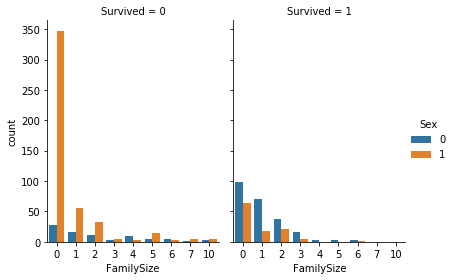

In [36]:
sb.catplot(x="FamilySize",hue="Sex", col="Survived",
                data=data, kind="count",
                height=4, aspect=.7)

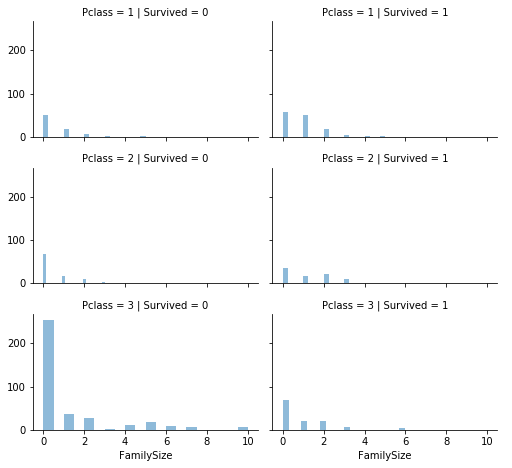

In [37]:
grid = sb.FacetGrid(data, row='Pclass',col='Survived', size=2.2, aspect=1.6)
grid.map(plt.hist, 'FamilySize', alpha=.5, bins=20)
grid.add_legend()

C:\Users\uchiha\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


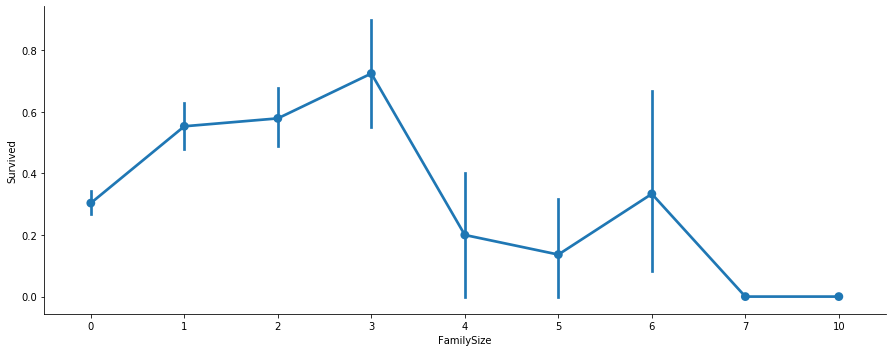

In [44]:
axes = sb.factorplot('FamilySize','Survived', 
                      data=data, aspect = 2.5, )

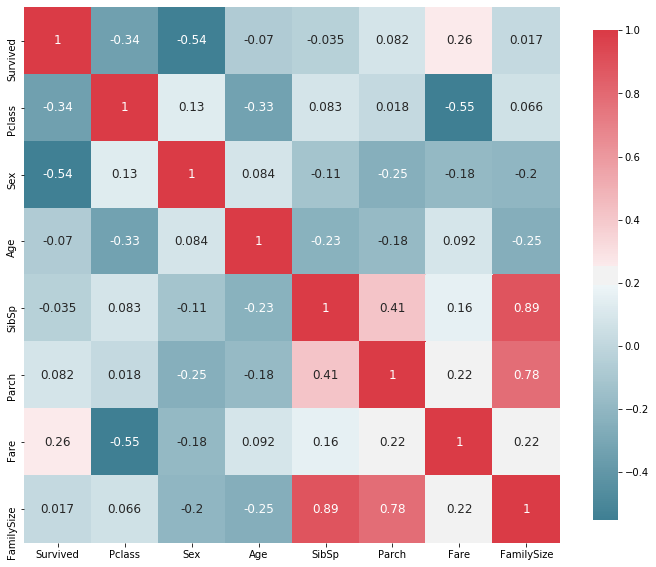

In [41]:
plot_correlation_map(data)

According to the correlation matrix, FamilySize is not as important as the features that I mentionned above